In [29]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from hyperion.model import ModelOutput
import astropy.constants as const

AU = const.au.cgs.value
mh = const.m_p.cgs.value

In [3]:
tsc    = ModelOutput('/Users/yaolun/bhr71/hyperion/controlled/model142.rtout')
nontsc = ModelOutput('/Users/yaolun/test/model_best_nontsc.rtout')

In [12]:
# TSC part
q_tsc = tsc.get_quantities()
d_tsc = q_tsc['density'][0].array.T

# non-TSC part
q_nontsc = nontsc.get_quantities()
d_nontsc = q_nontsc['density'][0].array.T

In [19]:
print np.shape(d_tsc)
a = 0.5*(q_tsc.r_wall[0:-1]+q_tsc.r_wall[1:])
print np.shape(a)

(479, 400, 50)
(479,)


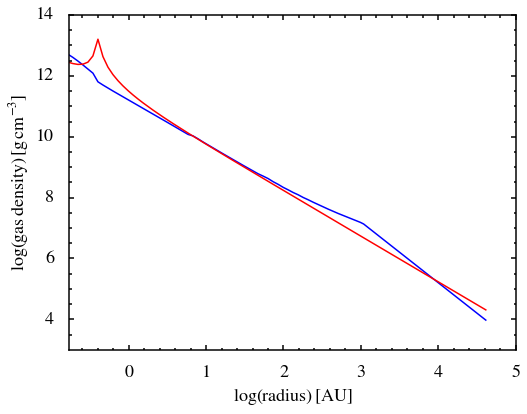

In [35]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)

ax.plot(np.log10(0.5*(q_tsc.r_wall[0:-1]+q_tsc.r_wall[1:])/AU), np.log10(d_tsc[:,199,0]/mh*100), 'b-', linewidth=1.5)
ax.plot(np.log10(0.5*(q_nontsc.r_wall[0:-1]+q_nontsc.r_wall[1:])/AU), np.log10(d_nontsc[:,199,0]/mh*100), 'r-', linewidth=1.5)

ax.set_ylim([3,14])
ax.set_xlim(left=np.log10(0.17))

ax.set_xlabel(r'$\rm{log(radius)\,[AU]}$', fontsize=18)
ax.set_ylabel(r'$\rm{log(gas\,density)\,[g\,cm^{-3}]}$', fontsize=18)
[ax.spines[axis].set_linewidth(1.5) for axis in ['top','bottom','left','right']]
ax.minorticks_on()
ax.tick_params('both',labelsize=18,width=1.5,which='major',pad=15,length=5)
ax.tick_params('both',labelsize=18,width=1.5,which='minor',pad=15,length=2.5)